# Reward statistics

In [1]:
import sys
from pathlib import Path

# Modify this as you wish, used for importing custom project packages, such as `utils`
project_path = str(Path.home()) + "\\Projects\\rlgym_demo"

sys.path.insert(0, project_path)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utils.analysis import plotting
from utils.analysis.reward_functions import common, extra, custom
from rlgym.utils import common_values

In [3]:
arena_positions = plotting.arena_positions

In [4]:
def generate_grid_positions(quarter_split=3, height=300):
    xs = np.linspace(common_values.SIDE_WALL_X, 
                     -common_values.SIDE_WALL_X, 
                     2 * quarter_split + 1)
    ys = np.linspace(common_values.BACK_WALL_Y, 
                     -common_values.BACK_WALL_Y, 
                     2 * quarter_split + 1)
    
    mesh_xs, mesh_ys = np.meshgrid(xs, ys)
    positions = np.stack([mesh_xs, mesh_ys], axis=-1).reshape(-1, 2)
    positions = np.hstack([positions, np.ones((positions.shape[0], 1)) * height])
    
    abs_positions = np.abs(positions)
    not_below_corner_condition = (abs_positions[:, 0] + abs_positions[:, 1] < 
                                  common_values.SIDE_WALL_X + common_values.BACK_WALL_Y - 1152)
    return positions[not_below_corner_condition]

In [5]:
ball_positions = generate_grid_positions()

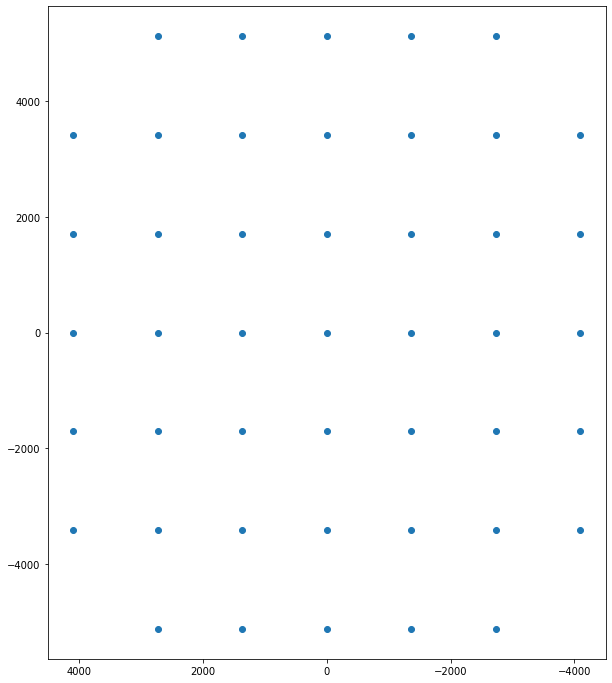

In [6]:
plt.figure(figsize=(10, 12))
plt.scatter(ball_positions[:, 0], ball_positions[:, 1])
plt.gca().invert_xaxis()
plt.show()

## Common

In [7]:
align_ball_zs = [common.align_ball(arena_positions, ball_position) for ball_position in ball_positions]

In [ ]:
ball_y_coord_zs = common.ball_y_coord(arena_positions)

Skip conditionals, constants, events

In [ ]:
angle0 = np.linspace(0, 2 * np.pi, )

In [ ]:
[common.face_ball(arena_positions, ball_position)]

In [ ]:
common.liu_dist_ball2goal(arena_positions)

In [ ]:
[common.liu_dist_player2ball(arena_positions, ball_position)]

In [ ]:
common.save_boost()

In [ ]:
common.touch_ball()

In [ ]:
common.velocity()

In [ ]:
[common.velocity_ball2goal(ball_position, ball_lin_velocity)]

In [ ]:
[common.velocity_player2ball(arena_positions, ball_lin_velocity, ball_position)]

## Extra

Skip extra rewards

## Custom

In [ ]:
[custom.ball_y_coord(ball_position, exponent)]

In [ ]:
[custom.liu_dist_player2ball(arena_positions, ball_position, dispersion, density)]

In [ ]:
custom.signed_liu_dist_ball2goal(arena_positions, dispersion, density)

## Additional

`common.liu_dist_ball2goal` orange minus blue goal distance difference, Necto style. Is signed Liu distance really useful?

Thoughts: 
- Touch ball with acceleration (toward goal)?
- Reward ball goal speed? Can I do with ball to goal velocity?
- Opponent punish weight in distributed team spirit reward?
- What is a good potential function?
- How much does dribbling reward? (semi-continuous ball reward, ball z=150)